In [7]:
#import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [8]:
#loading the dataset

heart= pd.read_csv('heart.csv')
saturation= pd.read_csv('o2Saturation.csv')
Columns= heart.columns

heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
#seperating the columns into X and Y data

X= heart.drop(['output'], axis=1)
y= heart['output']

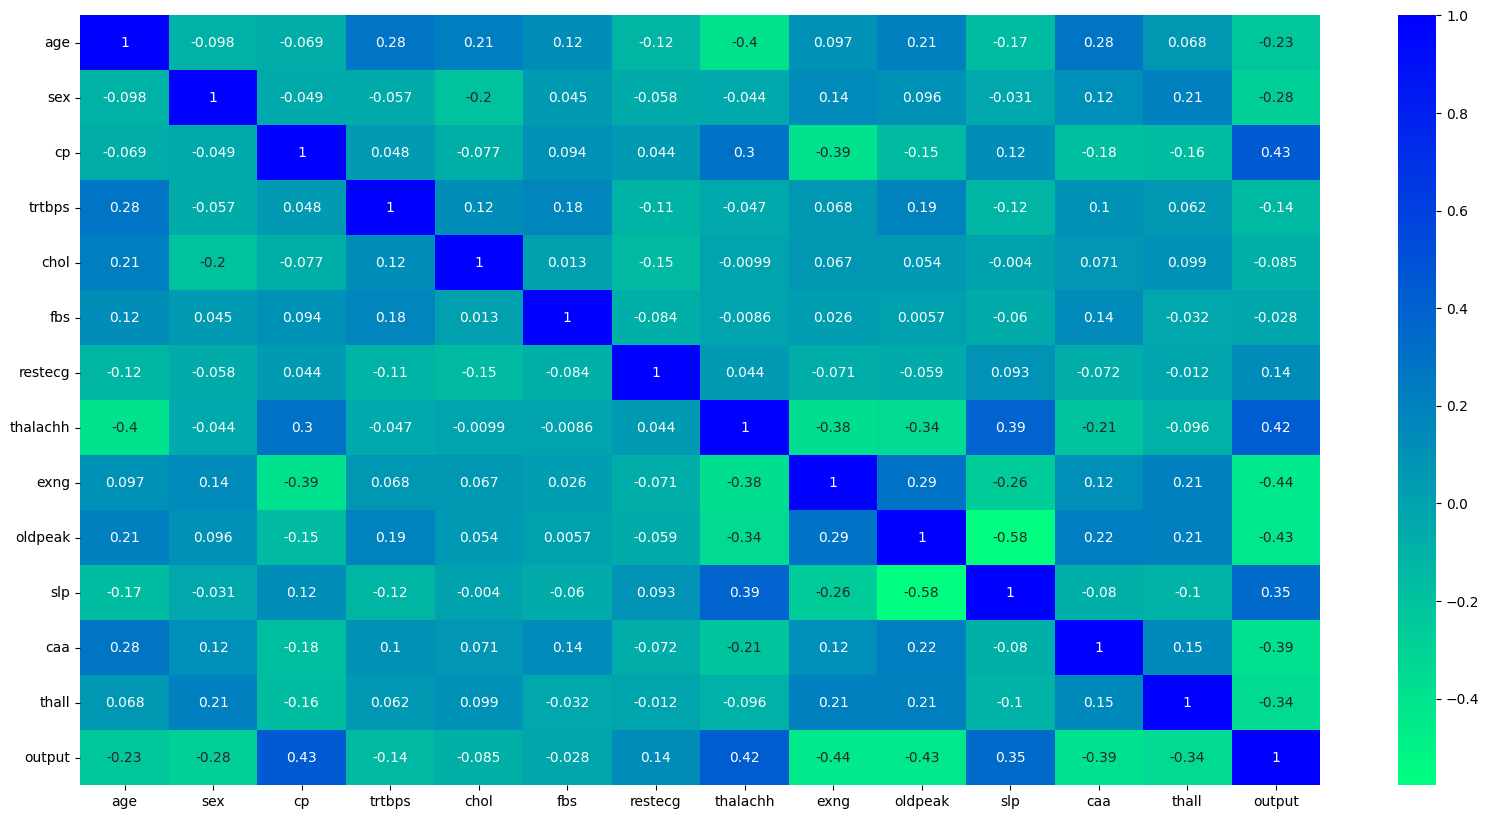

In [11]:
#Visualizing the relationship between every column in a  heatmap

import seaborn as sns
correlation= heart.corr() 
top_correlation=  correlation.index
plt.figure(figsize=(20,10))
g= sns.heatmap(heart[top_correlation].corr(), annot=True, cmap='winter_r')

In [12]:
#identifying the best features to use to train the model

bestfeatures= SelectKBest(score_func=chi2, k=7)
fit= bestfeatures.fit(X, y)

dfscores= pd.DataFrame(fit.scores_)
dfcolumns= pd.DataFrame(Columns)

In [13]:
scores= pd.concat([dfcolumns, dfscores], axis=1)
scores.columns= ['features', 'scores']

scores
print(scores.nlargest(10, 'scores'))

    features      scores
7   thalachh  188.320472
9    oldpeak   72.644253
11       caa   66.440765
2         cp   62.598098
8       exng   38.914377
4       chol   23.936394
0        age   23.286624
3     trtbps   14.823925
10       slp    9.804095
1        sex    7.576835


In [14]:
#using the best features(columns) for the training and test set

new_X= X[['thalachh', 'oldpeak', 'caa', 'cp', 'exng', 'chol', 'age', 'trtbps']]

X_train, X_test, y_train, y_test= train_test_split(new_X, y, random_state=0)

In [16]:
#standardizing the features 

scale= StandardScaler().fit(X_train)
X_scale= scale.transform(X_train)
X_trest= scale.transform(X_test)

In [27]:
#fitting the Xgboost classifier on the training set

model= XGBClassifier(learning_rate= 0.1, max_depth=5, min_child_weight= 3, eval_metric='auc')
model.fit(X_scale, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [28]:
#using the Xgboost model to predict the test set and checking it's accuracy

prediction= model.predict(X_trest)

print(model.score(X_trest, y_test))
print(classification_report(y_test, prediction))

0.7894736842105263
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        33
           1       0.80      0.84      0.82        43

    accuracy                           0.79        76
   macro avg       0.79      0.78      0.78        76
weighted avg       0.79      0.79      0.79        76



In [20]:
#fitting the training set on a random forest classifier 

classifier= RandomForestClassifier(max_features=4, max_depth=2, random_state=0)
classifier.fit(X_scale, y_train)

RandomForestClassifier(max_depth=2, max_features=4, random_state=0)

In [22]:
#Using the Random forest model to predict the test set and checking the accuracy 

predict= classifier.predict(X_trest)
print(classifier.score(X_scale, y_train))
print(classifier.score(X_trest, y_test))
print(classification_report(y_test, predict))

0.8678414096916299
0.8026315789473685
              precision    recall  f1-score   support

           0       0.82      0.70      0.75        33
           1       0.79      0.88      0.84        43

    accuracy                           0.80        76
   macro avg       0.81      0.79      0.79        76
weighted avg       0.80      0.80      0.80        76



In [23]:
#fitting the training set on a Kneighbors classifier 

mod= KNeighborsClassifier(n_neighbors=5).fit(X_scale, y_train)

In [25]:
#Using the Kneighbors model to predict the test set and checking the accuracy 

pred= mod.predict(X_trest)
print(mod.score(X_scale, y_train))
print(mod.score(X_trest, y_test))
print(classification_report(y_test, pred))

0.8149779735682819
0.8157894736842105
              precision    recall  f1-score   support

           0       0.85      0.70      0.77        33
           1       0.80      0.91      0.85        43

    accuracy                           0.82        76
   macro avg       0.82      0.80      0.81        76
weighted avg       0.82      0.82      0.81        76

